In [55]:
from sklearn import datasets
import warnings
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from autocluster.autohypothesis import autohypothesis_utils
import miceforest as mf

In [56]:
import numpy as np
import collections.abc
import six
import sklearn
collections.Iterable = collections.abc.Iterable
sklearn.externals.six = six
from skrules import SkopeRules

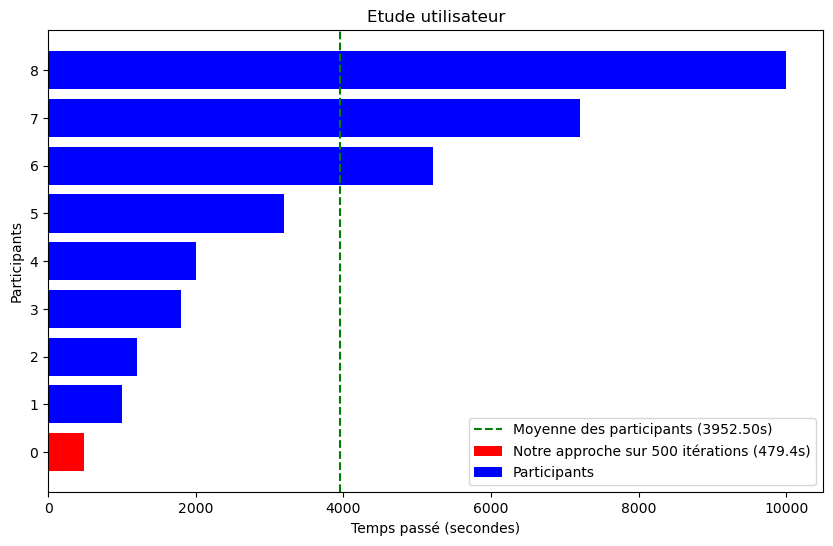

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Les données initiales
temps = sorted([1000, 1200, 3200, 7200, 1800, 2000, 5220, 10000])

# Ajout de l'approche supplémentaire en première position dans la liste
temps_incluant_nouvelle = [479.4] + temps 

# Calculer la moyenne des temps sans la nouvelle approche
moyenne_sans_nouvelle = np.mean(temps)

# Créer le graphique en barres horizontales
plt.figure(figsize=(10, 6))

# Ajouter la barre de la nouvelle approche en premier
plt.barh(0, temps_incluant_nouvelle[0], color='red', label='Notre approche sur 500 itérations (479.4s)')

# Ajouter les temps des utilisateurs
plt.barh(range(1, len(temps) + 1), temps, color='blue', label='Participants')

# Ligne de la moyenne en pointillé
plt.axvline(x=moyenne_sans_nouvelle, color='green', linestyle='--', label=f'Moyenne des participants ({moyenne_sans_nouvelle:.2f}s)')

plt.ylabel('Participants')
plt.xlabel('Temps passé (secondes)')
plt.title('Etude utilisateur')

# Modifier les étiquettes sur l'axe des y pour inclure la nouvelle approche comme le premier utilisateur
plt.yticks(range(len(temps_incluant_nouvelle)), range(len(temps_incluant_nouvelle)))

plt.legend()
plt.show()


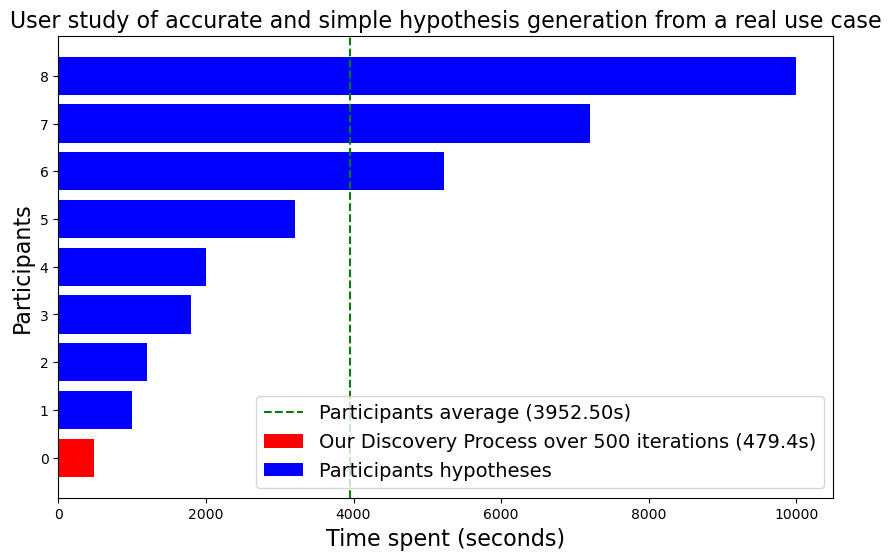

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# Initial data
times = sorted([1000, 1200, 3200, 7200, 1800, 2000, 5220, 10000])

# Adding the new approach at the first position in the list
times_including_new = [479.4] + times 

# Calculate the average time without the new approach
average_without_new = np.mean(times)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))

# Add the bar for the new approach first
plt.barh(0, times_including_new[0], color='red', label='Our Discovery Process over 500 iterations (479.4s)')

# Add the times for the users
plt.barh(range(1, len(times) + 1), times, color='blue', label='Participants hypotheses')

# Dotted line for the average
plt.axvline(x=average_without_new, color='green', linestyle='--', label=f'Participants average ({average_without_new:.2f}s)')

# Enhancing axes labels and title
plt.ylabel('Participants', fontsize=16)
plt.xlabel('Time spent (seconds)', fontsize=16)
plt.title('User study of accurate and simple hypothesis generation from a real use case', fontsize=16)

# Modify the y-axis labels to include the new approach as the first participant
plt.yticks(range(len(times_including_new)), range(len(times_including_new)))

plt.legend(fontsize=14)
plt.show()


In [59]:
emploi_df_old = pd.read_csv('emploi.csv',encoding='latin-1')
#emploi_df_old = pd.read_csv('emploi.csv').drop(columns=["brsa_clep","age","duree_inscription_pe","dernier_contact_pe"])
emploi_df_old.rename(columns={"duree_rsa_annee": "target"}, inplace=True)

In [60]:
df =emploi_df_old

In [61]:
category_mappings = {}

for column in df.columns:
    if df[column].dtype == 'object':
        # Convertir la colonne en type 'category' et enregistrer le mappage
        df[column] = df[column].astype('category')
        # Enregistre le mappage de la catégorie vers le code
        category_mappings[column] = dict(enumerate(df[column].cat.categories))
        # Encodage des catégories en entiers
        df[column] = df[column].cat.codes.replace(-1, np.nan)




In [62]:

# Create kernel. 
kds = mf.ImputationKernel(
  df,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm for 2 iterations
kds.mice(10)

# Return the completed dataset.
df_imputed = kds.complete_data()



In [63]:

for column in df_imputed.columns:
    if column in category_mappings:
        df_imputed[column] = df_imputed[column].map(category_mappings[column])


In [64]:

non_ordinal_columns = [column for column in df_imputed.columns if df_imputed[column].dtype == 'object']

# Applique le one-hot encoding seulement aux colonnes non ordinales
df_imputed = pd.get_dummies(df_imputed, columns=non_ordinal_columns, drop_first=True)


In [65]:
df_imputed.to_csv('emploi_imputed.csv', index=False)

In [66]:
import time
#start_time = time.time()
#exp,X_train, X_dev, y_train, y_dev  = opti_loop(df_imputed,200,norm = "minmax", optimize_obj="dual")
exp,X_train, X_dev, y_train, y_dev  = autohypothesis_utils.opti_loop(df_imputed,500, optimize_obj="dual")
#end_time = time.time()
#execution_time = end_time - start_time

[I 2024-06-05 11:00:03,100] A new study created in memory with name: no-name-f0c0b513-cd48-4a49-ab08-3caf29dcc991
[I 2024-06-05 11:00:03,933] Trial 0 finished with values: [0.49973614775725594, 0.0] and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 750, 'rf_max_depth': 12, 'rf_min_samples_split': 0.6970307811587592, 'rf_min_samples_leaf': 0.24810509330739913, 'rf_max_features': 'log2', 'rf_random_state': 42}. 
[I 2024-06-05 11:00:04,187] Trial 1 finished with values: [0.6744063324538259, 0.5967655641485876] and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 180, 'rf_max_depth': 17, 'rf_min_samples_split': 0.19590417030515955, 'rf_min_samples_leaf': 0.19911996254977374, 'rf_max_features': 'log2', 'rf_random_state': 42}. 
[I 2024-06-05 11:00:05,088] Trial 2 finished with values: [0.6955145118733509, 0.49644265119364506] and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 670, 'rf_max_depth': 6, 'rf_min_samples_split': 0.42598733904486924, 'rf_

In [120]:
import optuna

def get_pareto_front_trials(study):
    pareto_trials =  study.best_trials
    return pareto_trials


In [121]:
all_results = []
for i in range (0,len(exp.best_trials)-1):
    # Stockage des résultats pour cette itération
    all_results.append({
        "number": exp.best_trials[i].number,
        "accuracy": exp.best_trials[i].values[0],
        "entropy": 1-(exp.best_trials[i].values[1]),
        "params": exp.best_trials[i].params
    })

# Création du DataFrame pour toutes les runs
df_all = pd.DataFrame(all_results)
df_all.to_csv("opti_duo_500_rsa_old.csv")

In [122]:
import optuna
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import shap
# pareto_trials = get_pareto_front_trials(study)
def calculate_significant_shap(shap_values, X_val):
    significant_shap_counts = [np.sum(np.abs(values).mean(axis=0) / np.sum(np.abs(values).mean(axis=0)) > 0.01) for values in shap_values]
    total_significant_shap = max(significant_shap_counts)

    return total_significant_shap
def calculate_metrics_for_trial(trial_number):
    params = autohypothesis_utils.get_trial_hyperparams(exp, trial_number=trial_number)
    pipeline = autohypothesis_utils.rebuild_pipeline_with_hyperparams(params)
    pipeline.fit(X_train, y_train)    
    acc = accuracy_score(y_dev, pipeline.predict(X_dev))
    entropy = autohypothesis_utils.clusterEntropy(pipeline, X_dev, pipeline.predict(X_dev))
    f1 = f1_score(y_dev, pipeline.predict(X_dev))
        # Calcul des valeurs SHAP et du total significant SHAP
    explainer = shap.Explainer(pipeline.named_steps['classifier'])
    shap_values = explainer.shap_values(X_dev)
    total_significant_shap = calculate_significant_shap(shap_values, X_dev)
    # Calcul des SHAP values et des métriques liées ici (exemple simplifié)

    
    return acc, entropy, f1,total_significant_shap

# Initialisation du DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['trial_number', 'accuracy', 'simplicity', 'f1_score', 'total_significant_shap', 'percent_significant_shap'])

# Itération sur tous les trials du Pareto front
for trial in exp.trials:#get_pareto_front_trials(exp):
    trial_number = trial.number
    acc, entropy, f1,total_significant_shap = calculate_metrics_for_trial(trial_number)
    
    
    # Ajout des résultats dans le DataFrame
    new_row = {
        'trial_number': trial_number,
        'accuracy': 1-acc,
        'simplicity': entropy,
        'f1_score': f1,
        'total_significant_shap': total_significant_shap,

    }
    new_row_df = pd.DataFrame([new_row])  # Crée un DataFrame à partir de la nouvelle ligne
    results_df = pd.concat([results_df, new_row_df], ignore_index=True)


# Sauvegarde des résultats dans un fichier CSV
results_df.to_csv('trials_metrics.csv', index=False)

print("Résultats enregistrés avec succès.")


Résultats enregistrés avec succès.


In [123]:
#results_df = pd.read_csv('results_rsa_study.csv')

In [124]:
results_df = pd.read_csv('trials_metrics.csv')

In [125]:
results_df

,trial_number,accuracy,simplicity,f1_score,total_significant_shap,percent_significant_shap
0,0,0.500264,0.000000,0.666432,0,NaN
1,1,0.325594,0.596766,0.670230,7,NaN
2,2,0.304485,0.496443,0.690617,11,NaN
3,3,0.280739,0.393458,0.721466,16,NaN
4,4,0.499736,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...
495,495,0.500264,0.000000,0.666432,0,NaN
496,496,0.500264,0.000000,0.666432,0,NaN
497,497,0.500264,0.000000,0.666432,0,NaN
498,498,0.308179,0.515137,0.686359,11,NaN


In [126]:
results_df_simp = results_df
results_df_simp['simplicity'] = results_df_simp['simplicity'].apply(lambda x: 1-x)

In [166]:
extra_data_df = pd.read_csv('user_study_results.csv')

In [128]:
def pareto_front(df, columns, maximise=False):
    pareto = np.ones(df.shape[0], dtype=bool)
    for i, row in df.iterrows():
        for j, compare_row in df.iterrows():
            if i != j:
                if maximise:
                    if (compare_row[columns] >= row[columns]).all() and (compare_row[columns] > row[columns]).any():
                        pareto[i] = False
                        break
                else:
                    if (compare_row[columns] <= row[columns]).all() and (compare_row[columns] < row[columns]).any():
                        pareto[i] = False
                        break
    return df[pareto]


# Filtrer le DataFrame pour conserver uniquement les points du front de Pareto
df_pareto_simp = pareto_front(results_df_simp, ['accuracy', 'simplicity'], maximise=False)


In [129]:
df_pareto_significant = pareto_front(results_df, ['accuracy', 'total_significant_shap'], maximise=False)

In [130]:
df_pareto = pareto_front(results_df, ['accuracy', 'simplicity'], maximise=False)

In [131]:
df_pareto['accuracy'] = 1-df_pareto['accuracy']
df_pareto['simplicity'] = 1-df_pareto['simplicity']

In [132]:
df_pareto_significant["accuracy"] = 1-df_pareto_significant["accuracy"]

In [133]:
df_pareto_significant=df_pareto_significant.query('total_significant_shap>0')

In [134]:
df_pareto_simp["simplicity"] = 1-df_pareto_simp["simplicity"]
df_pareto_simp["accuracy"] = 1-df_pareto_simp["accuracy"]

In [164]:
df_pareto_simp=df_pareto_simp.query('accuracy>0.5')

In [136]:
extra_data_df

,id,simplicity,accuracy,total_significant_shap
0,1,[0.17079569069582035],[0.7155672823218997],[23]
1,2,[0.12845447258564868],[0.7160949868073878],[17]
2,3,[0.23255471328419453],[0.7345646437994723],[20]
3,4,[0.20909255709442742],[0.6432717678100264],[25]
4,5,[0.741940448967896],[0.5936675461741425],[3]
5,6,[0.45717320578525733],[0.7261213720316623],[11]
6,7,[0.23525106760547165],[0.7229551451187335],[18]
7,8,[0.40102748257547904],[0.7197889182058047],[18]
8,9,[0.45717320578525733],[0.7261213720316623],[11]


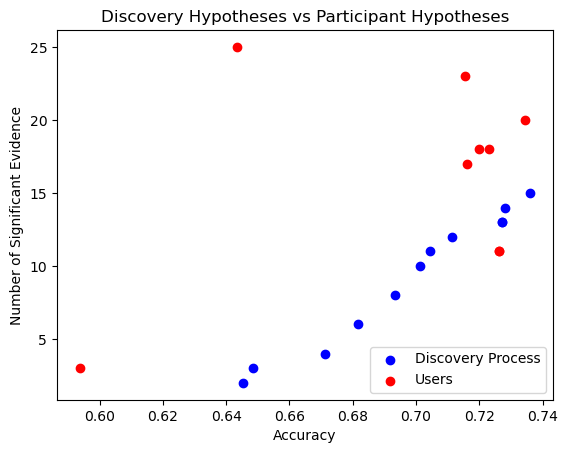

In [167]:
import matplotlib.pyplot as plt
def plot_pareto_front_and_shap(data, extra_data, feature):
    # Data from trials
    plt.scatter(data['accuracy'], data[feature], color='blue', label="Discovery Process")
    
    # Additional data
    plt.scatter(extra_data['accuracy'], extra_data[feature], color='red', label='Users')
    
    plt.title("Discovery Hypotheses vs Participant Hypotheses")
    plt.xlabel('Accuracy')
    plt.ylabel('Number of Significant Evidence')
    plt.legend()
    plt.show()


# Conversion des données supplémentaires en format numérique, car elles sont fournies en listes dans le fichier
extra_data_df['accuracy'] = extra_data_df['accuracy'].apply(lambda x: eval(x)[0])
extra_data_df['simplicity'] = extra_data_df['simplicity'].apply(lambda x: eval(x)[0])
extra_data_df['total_significant_shap'] = extra_data_df['total_significant_shap'].apply(lambda x: eval(x)[0])

# Appel de la fonction de tracé avec les données préparées
plot_pareto_front_and_shap(df_pareto_significant, extra_data_df,'total_significant_shap')


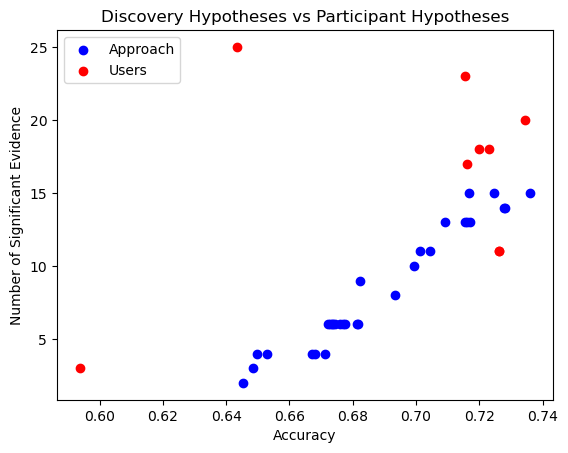

In [138]:
plot_pareto_front_and_shap(df_pareto_simp, extra_data_df,'total_significant_shap')

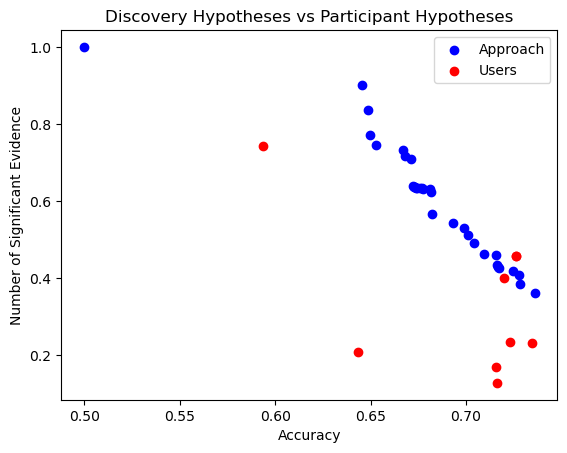

In [139]:
plot_pareto_front_and_shap(df_pareto, extra_data_df,"simplicity")

In [140]:
fig = optuna.visualization.plot_pareto_front(exp, target_names=["Accuracy", "Simplicité"], include_dominated_trials=False)
#fig = optuna.visualization.plot_pareto_front(motpe_experiment, target_names=["objective 1", "objective 2"])
fig.layout.title = 'Pareto-front MOTPE'
fig

In [141]:
all_objectives = np.array([trial.values for trial in exp.best_trials ])
#all_objectives = np.unique(all_objectives, axis=0)
sorted_objectives = all_objectives[np.argsort(all_objectives[:, 0])]
spread = np.mean(np.sqrt(np.sum(np.diff(sorted_objectives, axis=0)**2, axis=1)))
# Uniformité
uniformity = np.mean(np.std(np.diff(sorted_objectives, axis=0), axis=0))

# Taille du Front
front_size = len(all_objectives)

In [142]:
data = []
for trial in exp.best_trials:
    # Ici, on suppose que `values` contient [accuracy, entropy] dans cet ordre
    accuracy, entropy = (round(val, 3) for val in trial.values) if trial.values else (None, None)
    data.append({
        'number': trial.number,
        'accuracy': accuracy,
        'entropy': 1-entropy,
        'params': trial.params
    })

# Convertir la liste de dictionnaires en un DataFrame
df = pd.DataFrame(data)
df.to_csv("opti_duo_500_rsa_old.csv")

In [143]:
#X_dev[["diag_formation_ou"]].nunique()

In [144]:
from sklearn.metrics import f1_score


params = autohypothesis_utils.get_trial_hyperparams(exp, trial_number=33) #189
pipeline = autohypothesis_utils.rebuild_pipeline_with_hyperparams(params)
pipeline.fit(X_train, y_train)
acc = accuracy_score(y_dev, pipeline.predict(X_dev))
entropy = autohypothesis_utils.clusterEntropy(pipeline, X_dev, pipeline.predict(X_dev))
f1 = f1_score(y_dev, pipeline.predict(X_dev))
print(f"Accuracy: {acc:.4f} - Simplicity: {entropy:.4f} - F1: {f1:.4f}")


Accuracy: 0.6718 - Simplicity: 0.6119 - F1: 0.6695


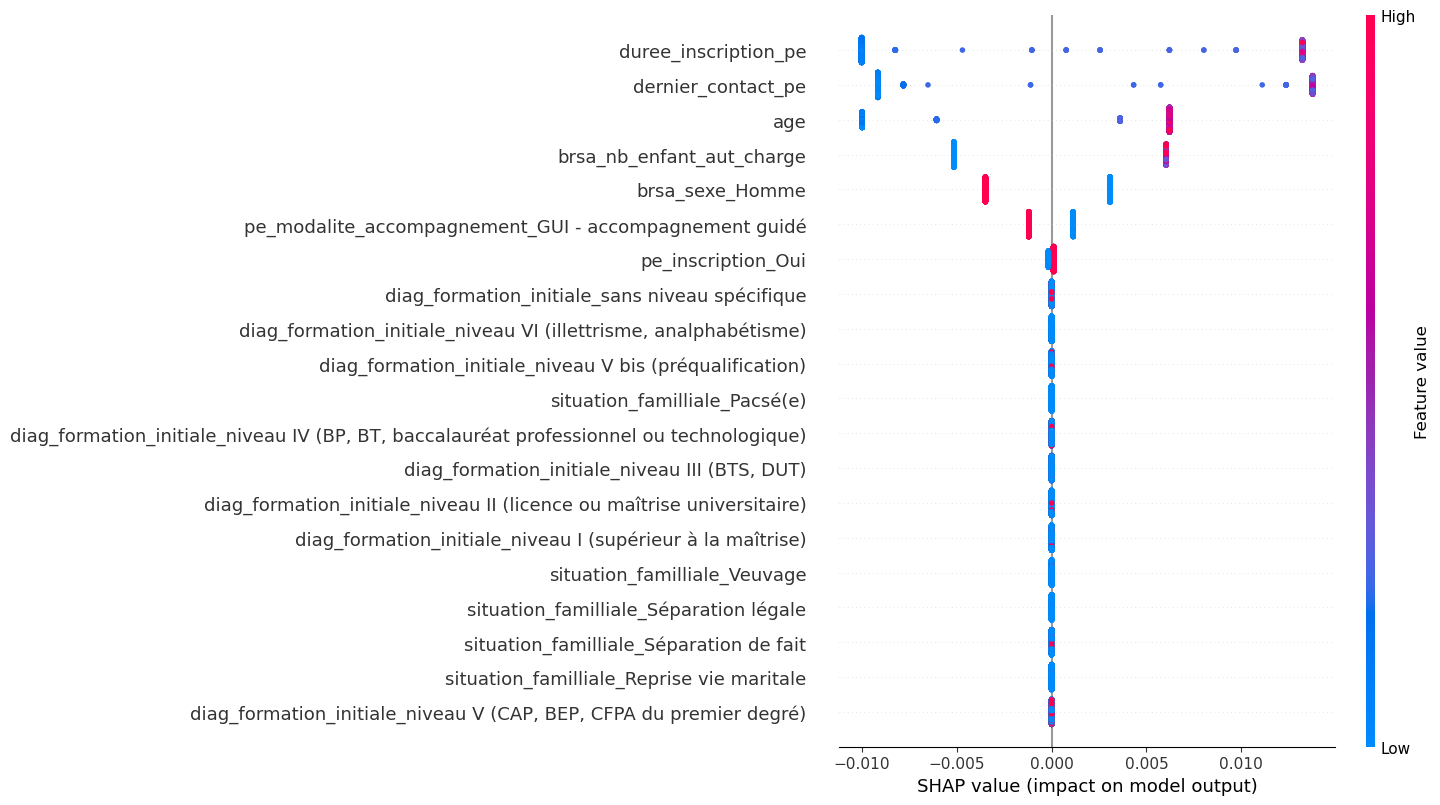

In [145]:
import shap
#X_dev_transformed = pipeline.named_steps['scaler'].transform(X_dev)
# Initialize your explainer
explainer = shap.Explainer(pipeline.named_steps['classifier'])

# Compute SHAP values
shap_values = explainer.shap_values(X_dev)

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values[1], X_dev)


In [146]:
import numpy as np
import pandas as pd

# Function to create the DataFrame with a correct prediction check
def create_shap_summary_dataframe(shap_values_3d, y_true):
    # Sum the SHAP values across the features for each class
    shap_sums = np.sum(shap_values_3d, axis=2)
    
    # Transpose the sums to get shape (n_instances, n_classes)
    shap_sums_transposed = shap_sums.transpose(1, 0)
    
    # Determine the class with the highest SHAP sum for each instance
    predicted_classes = np.argmax(shap_sums_transposed, axis=1)
    
    # Check if the predicted class is the same as the true class
    is_correct = predicted_classes == y_true
    
    # Create the DataFrame with the summed SHAP values and the boolean check
    df_shap_summary = pd.DataFrame(shap_sums_transposed, 
                                   columns=[f'shap_sum_class_{i}' for i in range(shap_sums.shape[0])])
    df_shap_summary['is_correct'] = is_correct  # True if prediction matches the true class
    
    return df_shap_summary

# Convert the list of arrays into a 3D numpy array
shap_values_3d = np.array(shap_values)

# Create the DataFrame using the SHAP values and true class labels
df_shap_summary = create_shap_summary_dataframe(shap_values_3d, y_dev)
#df_shap_summary  # Output the resulting DataFrame



In [147]:
# Calculating the number of instances where the original class has the highest SHAP value sum
num_instances_original_class_highest = df_shap_summary['is_correct'].sum()
num_instances_original_class_highest/len(df_shap_summary)


0.6744063324538259

In [148]:
X_dev = X_dev*1

In [149]:
import numpy as np
import pandas as pd

# Calculer les statistiques descriptives de X_dev
stats_describe = X_dev.describe()

# Fonction pour calculer les pourcentages réels couverts
def calculate_real_percentage_or_value(min_val, max_val, feature, stats):
    if min_val == max_val:  # Si min et max sont égaux, retourner la valeur directement
        return str(min_val)
    else:
        total_range = stats.at['max', feature] - stats.at['min', feature]
        if total_range > 0:
            min_percentage = ((min_val - stats.at['min', feature]) / total_range) * 100
            max_percentage = ((max_val - stats.at['min', feature]) / total_range) * 100
            return f"{min_percentage:.2f}%-{max_percentage:.2f}%"
        else:
            return "N/A"

# Initialiser une liste globale pour collecter les données de toutes les classes
all_data = []

# Boucle sur toutes les classes disponibles dans `shap_values`
for classe in range(len(shap_values)):
    indices_of_class = [i for i, label in enumerate(y_dev) if label == classe]
    global_mean_abs_shap = np.mean(np.abs(shap_values[classe][indices_of_class, :]), axis=0).sum()
    data = []
    
    for i, feature_name in enumerate(X_dev.columns):
        positive_indices = [idx for idx in indices_of_class if shap_values[classe][idx, i] > 0]
        negative_indices = [idx for idx in indices_of_class if shap_values[classe][idx, i] < 0]
        original_values_positive = X_dev.iloc[positive_indices, i]
        original_values_negative = X_dev.iloc[negative_indices, i]
        positive_impact_percentage = len(positive_indices) / len(shap_values[classe][indices_of_class, i]) * 100
        mean_shap_values = np.mean(shap_values[classe][indices_of_class, i], axis=0)
        # Gérer "Rule For" et "Rule Against" pour afficher une valeur unique si min == max
        rule_for = f"{original_values_positive.min()}" if original_values_positive.min() == original_values_positive.max() else f"{original_values_positive.min()} and < {original_values_positive.max()}"
        rule_against = f"{original_values_negative.min()}" if original_values_negative.min() == original_values_negative.max() else f"{original_values_negative.min()} and < {original_values_negative.max()}"
        importance_sign = "Positive" if mean_shap_values > 0 else "Negative"
        data.append({
            'Class': classe,
            'Feature': feature_name,
            'Rule For': rule_for,
            'Rule Against': rule_against,
            'Couverture Pour': positive_impact_percentage,
            'Couverture Contre': 100-positive_impact_percentage,
            'Intervalle Pour': calculate_real_percentage_or_value(original_values_positive.min(), original_values_positive.max(), feature_name, stats_describe),
            'Intervalle Contre': calculate_real_percentage_or_value(original_values_negative.min(), original_values_negative.max(), feature_name, stats_describe),
            'Importance': round((np.abs(shap_values[classe][:, i]).mean() / np.sum(np.abs(shap_values[classe]).mean(axis=0))) * 100, 2),
            #'Signe Importance': importance_sign
        })
    
    all_data.extend(data)

# Créer le DataFrame final à partir de la liste globale
results_df = pd.DataFrame(all_data).sort_values('Importance', ascending=False).query('`Couverture Pour` > 0')

# Filtrer les résultats pour les instances avec une importance significative
filtered_results_df = results_df.query('Class == 0 and `Rule For` != "N/A" and Importance > 1')

# Calculer le pourcentage de couverture de toutes les features sur les instances
important_features = results_df[results_df['Importance'] > 1]['Feature'].unique()
instance_coverage = X_dev.apply(lambda row: any(row[important_features] > 0), axis=1).mean() * 100

# Afficher le pourcentage de couverture
print(f"Pourcentage de couverture des instances par des features importantes: {instance_coverage:.2f}%")

# Afficher les résultats filtrés
filtered_results_df


Pourcentage de couverture des instances par des features importantes: 100.00%


,Class,Feature,Rule For,Rule Against,Couverture Pour,Couverture Contre,Intervalle Pour,Intervalle Contre,Importance
3,0,duree_inscription_pe,71.0 and < 570.0,583.0 and < 5096.0,71.308017,28.691983,0.02%-7.64%,7.84%-76.84%,28.47
2,0,dernier_contact_pe,70.0 and < 548.0,564.0 and < 5477.0,70.253165,29.746835,0.00%-8.84%,9.14%-100.00%,27.59
0,0,age,18 and < 32,33 and < 68,46.835443,53.164557,1.61%-24.19%,25.81%-82.26%,18.43
1,0,brsa_nb_enfant_aut_charge,0,1 and < 6,64.135021,35.864979,0,16.67%-100.00%,13.98
4,0,brsa_sexe_Homme,1,0,54.852321,45.147679,1,0,8.26
62,0,pe_modalite_accompagnement_GUI - accompagnemen...,1,0,52.953586,47.046414,1,0,2.94


In [150]:
results_df.query('Class == 1 and `Rule For` != "N/A" and Importance > 1')

,Class,Feature,Rule For,Rule Against,Couverture Pour,Couverture Contre,Intervalle Pour,Intervalle Contre,Importance
69,1,duree_inscription_pe,583.0 and < 6611.0,70.0 and < 575.0,60.929250,39.070750,7.84%-100.00%,0.00%-7.72%,28.47
68,1,dernier_contact_pe,564.0 and < 5433.0,70.0 and < 563.0,53.009504,46.990496,9.14%-99.19%,0.00%-9.12%,27.59
66,1,age,33 and < 79,17 and < 32,71.172122,28.827878,25.81%-100.00%,0.00%-24.19%,18.43
67,1,brsa_nb_enfant_aut_charge,1 and < 6,0,55.015839,44.984161,16.67%-100.00%,0,13.98
70,1,brsa_sexe_Homme,0,1,55.438226,44.561774,0,1,8.26
128,1,pe_modalite_accompagnement_GUI - accompagnemen...,0,1,52.375924,47.624076,0,1,2.94


In [151]:
# Créer le DataFrame final à partir de la liste globale
results_df = pd.DataFrame(all_data).sort_values('Importance', ascending=False).query('`Couverture Pour` > 0')
results_df.query('Class == 0 and `Rule For` != "N/A" and Importance > 1')

# Sélectionner une instance par son index
instance_index = 0  # Remplacez par l'index de l'instance que vous souhaitez analyser

# Accéder à l'instance spécifique dans shap_values
# On assume que shap_values est une liste de tableaux numpy, un pour chaque classe
# On combine les valeurs SHAP de toutes les classes pour l'instance spécifique
instance_shap_values = np.sum([shap_values[classe][instance_index, :] for classe in range(len(shap_values))], axis=0)

# Créer un DataFrame pour les features de l'instance sélectionnée
instance_data = []
for i, feature_name in enumerate(X_dev.columns):
    instance_data.append({
        'Feature': feature_name,
        'SHAP Value': instance_shap_values[i]
    })

instance_df = pd.DataFrame(instance_data).sort_values('SHAP Value', ascending=False)

# Tableau avec les features ayant un impact positif et négatif
positive_impact_df = instance_df.query('`SHAP Value` > 0')
negative_impact_df = instance_df.query('`SHAP Value` < 0')

# Normaliser les valeurs SHAP pour que la somme de chaque groupe soit égale à 100
def normalize_shap_values(df):
    total_sum = df['SHAP Value'].sum()
    df['Importance'] = 100 * df['SHAP Value'] / total_sum
    return df

positive_impact_df = normalize_shap_values(positive_impact_df)
negative_impact_df = normalize_shap_values(negative_impact_df)

# Filtrer les features avec un impact supérieur à epsilon ou inférieur à -epsilon
epsilon = 1  # Remplacez par la valeur de l'epsilon souhaitée (normalisée entre 0 et 100)
filtered_positive_impact_df = positive_impact_df.query('`Importance` > @epsilon')
filtered_negative_impact_df = negative_impact_df.query('`Importance` > @epsilon')
discarded_positive_impact_df = positive_impact_df.query('`Importance` < @epsilon')
discarded_negative_impact_df = negative_impact_df.query('`Importance` < @epsilon')
# Créer un troisième tableau avec toutes les features ayant un impact inférieur à epsilon
low_impact_df = pd.concat([discarded_positive_impact_df, discarded_negative_impact_df])
low_impact_df['Impact'] = np.where(low_impact_df['SHAP Value'] > 0, 'Positive', 'Negative')
#low_impact_df.rename(columns={'SHAP Value': 'Importance'}, inplace=True)



# Afficher les résultats
print("Features avec Impact Positif:")
filtered_positive_impact_df.sort_values('Importance', ascending=False)


Features avec Impact Positif:


,Feature,SHAP Value,Importance
3,duree_inscription_pe,1.734723e-18,80.0
4,brsa_sexe_Homme,4.336809e-19,20.0


In [152]:
print("Features avec Impact Négatif:")
filtered_negative_impact_df.sort_values('Importance', ascending=False)


Features avec Impact Négatif:


,Feature,SHAP Value,Importance
2,dernier_contact_pe,-1.734723e-18,27.586207
1,brsa_nb_enfant_aut_charge,-1.734723e-18,27.586207
46,pe_inscription_Oui,-1.517883e-18,24.137931
62,pe_modalite_accompagnement_GUI - accompagnemen...,-1.301043e-18,20.689655


In [153]:
print("Features avec Impact Faible (<= epsilon):")
low_impact_df.sort_values('Importance', ascending=False)

Features avec Impact Faible (<= epsilon):


,Feature,SHAP Value,Importance,Impact


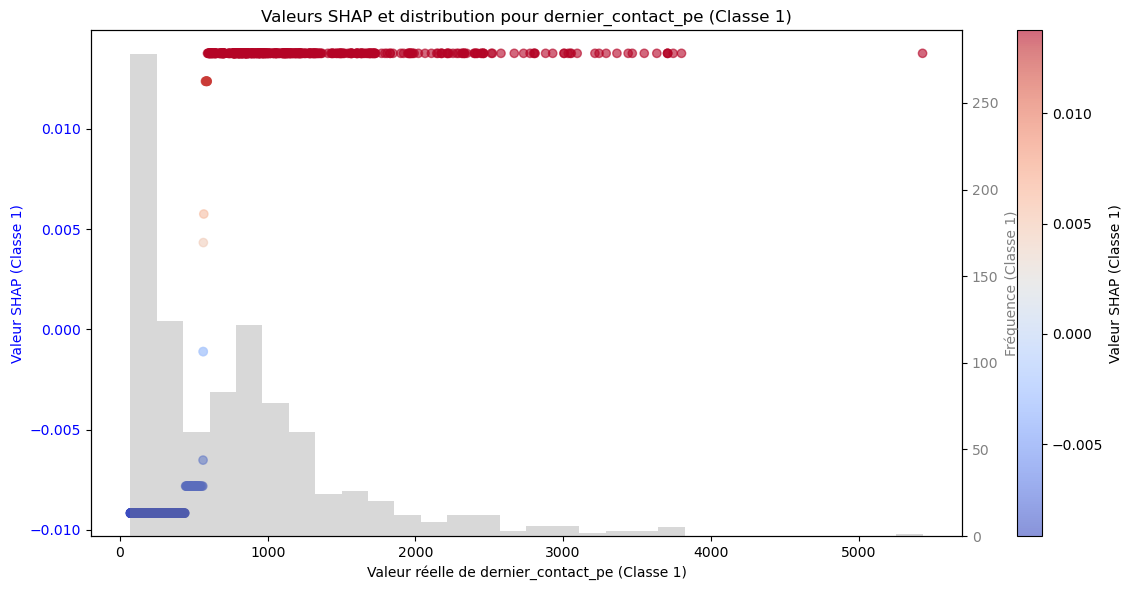

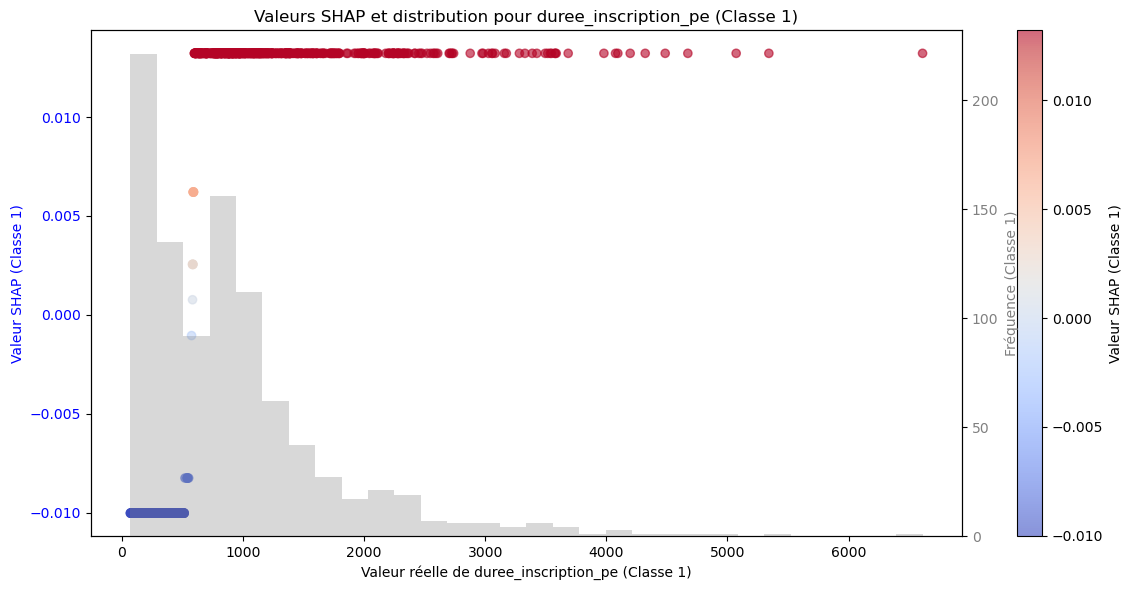

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supposons que y_dev est un vecteur ou une série Pandas indiquant l'appartenance à la classe
# et que shap_values est déjà calculé pour les prédictions de la classe 1

# Calculer les statistiques descriptives de X_dev pour identifier les caractéristiques non-binaires
non_binary_features = [col for col in X_dev.columns if len(X_dev[col].unique()) > 2]

# Créer un DataFrame pour collecter l'importance de chaque caractéristique
feature_importances = pd.DataFrame(index=X_dev.columns, columns=['Importance'])

# Calculer l'importance globale des caractéristiques
for i, feature_name in enumerate(X_dev.columns):
    feature_importance = np.abs(shap_values[1][:, i]).mean()  # Assume shap_values[1] est pour la classe 1
    feature_importances.at[feature_name, 'Importance'] = feature_importance

# Filtrer les caractéristiques non-binaires avec un score d'Importance supérieur à 1
important_features = feature_importances.query('Importance > 0.01').index.intersection(non_binary_features)

# Filtrer X_dev pour ne garder que les instances appartenant à la classe 1
X_dev_class_1 = X_dev[y_dev == 1]

# Créer des graphiques pour chaque caractéristique sélectionnée en se limitant à la classe 1
for feature_name in important_features:
    feature_index = X_dev.columns.get_loc(feature_name)
    feature_values_class_1 = X_dev_class_1[feature_name]
    shap_values_for_feature_class_1 = shap_values[1][y_dev == 1, feature_index]

    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Utiliser un dégradé de couleurs pour représenter les valeurs SHAP de la classe 1
    scatter = ax1.scatter(feature_values_class_1, shap_values_for_feature_class_1, c=shap_values_for_feature_class_1, cmap='coolwarm', alpha=0.6)
    ax1.set_xlabel(f'Valeur réelle de {feature_name} (Classe 1)')
    ax1.set_ylabel('Valeur SHAP (Classe 1)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Valeurs SHAP et distribution pour {feature_name} (Classe 1)')
    
    # Ajouter une barre de couleur pour indiquer l'échelle des valeurs SHAP
    cbar = fig.colorbar(scatter, ax=ax1)
    cbar.set_label('Valeur SHAP (Classe 1)')
    
    # Ajout de l'axe pour l'histogramme de distribution, seulement pour la classe 1
    ax2 = ax1.twinx()
    ax2.hist(feature_values_class_1, bins=30, color='grey', alpha=0.3)
    ax2.set_ylabel('Fréquence (Classe 1)', color='grey')
    ax2.tick_params(axis='y', labelcolor='grey')

    fig.tight_layout()
    plt.show()


In [155]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
class MyNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for cls in self.classes:
            X_cls = X[y == cls]
            self.parameters[cls] = {
                'mean': X_cls.mean(axis=0),
                'var': np.var(X_cls, axis=0, ddof=1),
                'prior': np.log(len(X_cls) / len(X))  # Stocker le log des priors
            }

    def _calculate_log_proba(self, X, cls):
        eps = 1e-6  # Pour éviter la division par zéro
        mean = self.parameters[cls]['mean']
        var = self.parameters[cls]['var']
        prior_log = self.parameters[cls]['prior']
        
        # Calcul du terme qui ne dépend que de var + eps, une fois par classe
        sum_log_var = np.sum(np.log(2. * np.pi * var + eps))
        # Calcul du logarithme de la probabilité conditionnelle pour chaque caractéristique
        log_proba = -0.5 * sum_log_var - 0.5 * np.sum(((X - mean) ** 2) / (var + eps), axis=1)
        return log_proba + prior_log

    def predict_log_proba(self, X):
        log_probas = np.array([self._calculate_log_proba(X, cls) for cls in self.classes]).T
        # Normalisation pour obtenir des log-probabilités, améliorant la stabilité numérique
        a_max = np.max(log_probas, axis=1, keepdims=True)
        log_probas -= a_max
        log_sum_exp = a_max + np.log(np.sum(np.exp(log_probas), axis=1, keepdims=True))
        return log_probas - log_sum_exp

    def predict_proba(self, X):
        return np.exp(self.predict_log_proba(X))
    
    def predict(self, X):
        log_probas = self.predict_log_proba(X)
        return self.classes[np.argmax(log_probas, axis=1)]
    
    def predict_feature_proba(self, X):
        # Cette méthode n'était pas définie précédemment. Assurez-vous qu'elle soit bien incluse dans la classe.
        feature_probas = np.zeros((X.shape[0], X.shape[1], len(self.classes)))
        for i, cls in enumerate(self.classes):
            eps = 1e-6
            mean = self.parameters[cls]['mean']
            var = self.parameters[cls]['var']
            # Calcul des probabilités conditionnelles pour chaque caractéristique
            numerator = np.exp(-((X - mean) ** 2) / (2 * var + eps))
            denominator = np.sqrt(2 * np.pi * var + eps)
            feature_probas[:, :, i] = numerator / denominator
        # Normalisation des probabilités pour chaque caractéristique par classe
        sum_over_classes = np.sum(feature_probas, axis=2, keepdims=True)
        feature_probas /= sum_over_classes
        return feature_probas
    def calculate_woe(self, X):
            feature_probas = self.predict_feature_proba(X)  # shape: (instances, features, classes)
            woe_values = np.zeros_like(feature_probas)

            for cls_idx, cls in enumerate(self.classes):
                # Calculate P(f | not h) for the current class
                p_f_not_h = np.sum(feature_probas[:, :, :], axis=2) - feature_probas[:, :, cls_idx]
                p_f_not_h /= (len(self.classes) - 1)  # Average over all classes except the current one

                # Avoid division by zero
                p_f_not_h = np.clip(p_f_not_h, 1e-9, 1-1e-9)
                p_f_h = np.clip(feature_probas[:, :, cls_idx], 1e-9, 1-1e-9)

                # Calculate WoE
                woe_values[:, :, cls_idx] = np.log(p_f_h / p_f_not_h)

            return woe_values

# Création et entraînement du modèle
nb_model = MyNaiveBayes()
nb_model.fit(X_train, y_train)

# Calcul des probabilités conditionnelles des caractéristiques pour chaque classe
# Attention : Assurez-vous que la méthode `predict_feature_proba` a été ajoutée à la classe `MyNaiveBayes`
feature_probas = nb_model.predict_feature_proba(X_dev)
feature_woe = nb_model.calculate_woe(X_dev)
# feature_probas est maintenant le tableau des probabilités conditionnelles demandé
# Il a une forme de (nombre d'instances, nombre de caractéristiques, nombre de classes)
y_pred = nb_model.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)
accuracy2 = accuracy_score(y_dev, y_pred)
all_data = []

# Boucle sur toutes les classes disponibles dans `feature_woe`
# Ici, 'classe' indexe la dernière dimension de 'feature_woe'
for classe in range(feature_woe.shape[2]):
    data = []

    for i, feature_name in enumerate(X_dev.columns):
        # Extraction de la colonne de valeurs pour la caractéristique actuelle et la classe spécifique
        woe_values_for_feature_and_class = feature_woe[:, i, classe]
        
        # Calcul de la valeur moyenne de WoE pour la caractéristique et la classe
        mean_woe_value = np.mean(woe_values_for_feature_and_class)
        
        # Assurez-vous que les dimensions correspondent pour le calcul de la corrélation
        correlation = np.corrcoef(X_dev[feature_name], woe_values_for_feature_and_class)[0, 1]

        
        data.append({
            'Class': classe,
            'Feature': feature_name, 
            'Mean_WoE_Value': round(mean_woe_value, 2),
        })

    all_data.extend(data)

# Création du DataFrame à partir de la liste globale
results_woe = pd.DataFrame(all_data).sort_values(by=['Class', 'Mean_WoE_Value'], ascending=[True, False])


# Affichage des résultats
#results_woe.query('Class==1 and Mean_WoE_Value>0')

In [156]:
#results_woe.query('Class==1 and Mean_WoE_Value<0').sort_values(by='Mean_WoE_Value')

In [157]:
accuracy

0.6300791556728232

In [158]:
accuracy2

0.6575197889182058

In [159]:
woe_sum = np.sum(feature_woe, axis=1)
predicted_classes = np.argmax(woe_sum, axis=1)
is_correct = predicted_classes == y_dev

In [160]:
new_df = pd.DataFrame(woe_sum)
new_df["is_correct"] = is_correct

In [161]:
new_df

,0,1,is_correct
0,15.912086,-15.912086,False
1,-2.605380,2.605380,True
2,-16.880164,16.880164,True
3,-5.949128,5.949128,False
4,-15.068023,15.068023,True
...,...,...,...
1890,-14.978116,14.978116,True
1891,-4.460268,4.460268,False
1892,-7.900078,7.900078,False
1893,-7.187897,7.187897,True


In [162]:
# Calculating the number of instances where the original class has the highest SHAP value sum
num_instances_original_class_highest = new_df['is_correct'].sum()
num_instances_original_class_highest/len(new_df)


0.6300791556728232